In [16]:
with open("the_vedrict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [17]:
import re
text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)
print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [18]:
result = re.split(r'([,.]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [19]:
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [20]:
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [21]:
preprocessed = re.split(r'([,.?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed))

4649


In [22]:
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [23]:
all_words = sorted(list(set(preprocessed)))
vocab_size = len(all_words)
print(vocab_size)

1159


In [24]:
vocab = {token:integer for integer,token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
    print(item)
    if i > 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Carlo;', 25)
('Chicago', 26)
('Claude', 27)
('Come', 28)
('Croft', 29)
('Destroyed', 30)
('Devonshire', 31)
('Don', 32)
('Dubarry', 33)
('Emperors', 34)
('Florence', 35)
('For', 36)
('Gallery', 37)
('Gideon', 38)
('Gisburn', 39)
('Gisburns', 40)
('Grafton', 41)
('Greek', 42)
('Grindle', 43)
('Grindle:', 44)
('Grindles', 45)
('HAD', 46)
('Had', 47)
('Hang', 48)
('Has', 49)
('He', 50)
('Her', 51)


In [25]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab #A
        self.int_to_str = {i:s for s,i in vocab.items()} #B
    def encode(self, text): #C
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    def decode(self, ids): #D
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text) #E
        return text

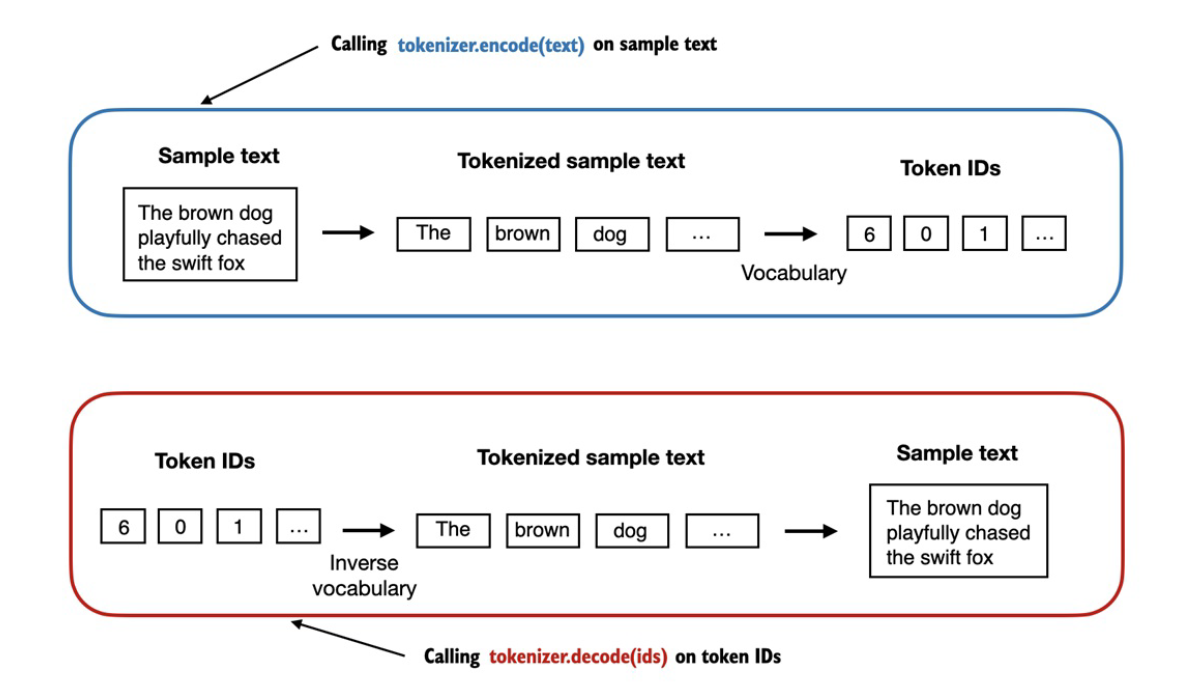

In [26]:
tokenizer = SimpleTokenizerV1(vocab)

In [27]:
text = """"It's the last he painted, you know," Mrs. Gisburn said with pardonable""" 
ids = tokenizer.encode(text)
print(ids)

[1, 58, 2, 872, 1013, 615, 541, 763, 5, 1155, 608, 5, 1, 69, 7, 39, 873, 1136, 773]


In [28]:
print(tokenizer.decode(ids))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable


In [29]:
# text = "Hello, do you like tea?"
# tokenizer.encode(text)

In [30]:
#Addnig special context label <|UNK|> and <|ENDOFTEXT|>
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}
print(len(vocab.items()))

1161


In [31]:
for i, item in enumerate(list(vocab.items())[-5:]):
  print(item)

('younger', 1156)
('your', 1157)
('yourself', 1158)
('<|endoftext|>', 1159)
('<|unk|>', 1160)


In [32]:
class SimpleTokenizerV2:
  def __init__(self, vocab):
    self.str_to_int = vocab
    self.int_to_str = { i:s for s,i in vocab.items()}
  def encode(self, text):
    preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
    preprocessed = [item.strip() for item in preprocessed if item.strip()]
    preprocessed = [item if item in self.str_to_int #A
    else "<|unk|>" for item in preprocessed]
    ids = [self.str_to_int[s] for s in preprocessed]
    return ids
  def decode(self,text):
    text = " ".join([self.int_to_str[i] for i in ids])
    text = re.sub(r'\s+([,.?!"()\'])', r'\1', text) #B
    return text

In [33]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [34]:
tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text))

[1160, 5, 362, 1155, 642, 1000, 10, 1159, 57, 1013, 981, 1009, 738, 1013, 1160, 7]


In [35]:
print(tokenizer.decode(tokenizer.encode(text)))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable


In [36]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [37]:
from importlib.metadata import version
import tiktoken
print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.7.0


In [38]:
tokenizer = tiktoken.get_encoding("gpt2")

In [39]:
text = "Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace."
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 286, 617, 34680, 27271, 13]


In [40]:
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace.


In [41]:
unknown_tex ="Akwirw ier"
ids_unk = tokenizer.encode(unknown_tex,allowed_special={"<|endoftext|>"})
print(ids_unk)

[33901, 86, 343, 86, 220, 959]


In [42]:
unknown_decoded = tokenizer.decode(ids_unk)
print(unknown_decoded)

Akwirw ier


In [43]:
with open("the_vedrict.txt", "r", encoding="utf-8") as f:
  raw_text = f.read()
enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [44]:
enc_sample = enc_text[50:]

In [45]:
context_size = 4 #A
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y: {y}")

x: [290, 4920, 2241, 287]
y: [4920, 2241, 287, 257]


In [46]:
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]
  print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [47]:
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]
  print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


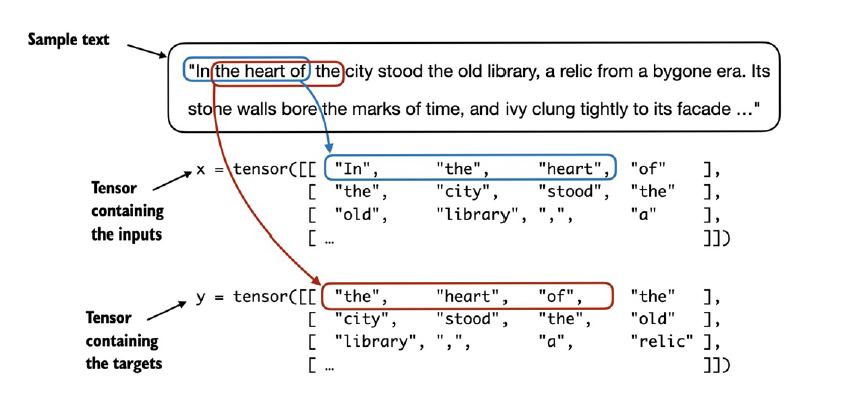

In [48]:
import torch
from torch.utils.data import Dataset, DataLoader

In [49]:
# torch.cuda .is_available()

In [50]:
class GPTDatasetV1(Dataset):
  def __init__(self, txt, tokenizer, max_length, stride):
    self.tokenizer = tokenizer
    self.input_ids = []
    self.target_ids = []
    token_ids = tokenizer.encode(txt) #A
    for i in range(0, len(token_ids) - max_length, stride): #B
      input_chunk = token_ids[i:i + max_length]
      target_chunk = token_ids[i + 1: i + max_length + 1]
      self.input_ids.append(torch.tensor(input_chunk))
      self.target_ids.append(torch.tensor(target_chunk))
  def __len__(self):
    return len(self.input_ids)
  
  def __getitem__(self,idx):
    return self.input_ids[idx], self.target_ids[idx]

In [51]:
def create_dataloader_v1(txt, batch_size=4,
  max_length=256, stride=128, shuffle=True, drop_last=True):
  tokenizer = tiktoken.get_encoding("gpt2") #A
  dataset = GPTDatasetV1(txt, tokenizer, max_length, stride) #B
  dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last) 
  return dataloader

In [52]:
with open("the_vedrict.txt", "r", encoding="utf-8") as f:
  raw_text = f.read()

In [53]:
dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)
data_iter = iter(dataloader) #A
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [56]:
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[  373,   366, 47914,  1298],
        [  319,   884,   257,   705],
        [  262,  1466,  1444,   340],
        [  339,   442, 17758, 12036],
        [ 1165,  2739,   438,    40],
        [  407,   644,   530,  3382],
        [  198,   198,     1,    40],
        [  338,   281, 12659,  2829]])

Targets:
 tensor([[  366, 47914,  1298,   319],
        [  884,   257,   705, 32796],
        [ 1466,  1444,   340,    13],
        [  442, 17758, 12036,  1701],
        [ 2739,   438,    40,  1183],
        [  644,   530,  3382,   284],
        [  198,     1,    40,  4601],
        [  281, 12659,  2829,  1122]])


In [58]:
input_ids = torch.tensor([2, 3, 5, 1])
vocab_size = 6
output_dim = 3

In [59]:
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [60]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [61]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


In [62]:
output_dim = 256
vocab_size = 50257
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [64]:
max_length = 4
dataloader = create_dataloader_v1(
raw_text, batch_size=8, max_length=max_length, stride=max_length,shuffle=False)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [65]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [66]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [ ]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)